# Machine Learning using MNIST Dataset

## Classification Algorithms:
    1.SVM Classifier
    2.Logistic Regression
    3.Random Forest
    4.XGBoost

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns
import random

from tqdm import tqdm

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from random import randint

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#from pactools.grid_search import GridSearchCVProgressBar

from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


### Read data from two files train.csv and test.csv

In [7]:
mnist_train = pd.read_csv(r'C:\Users\DEEPIKA\Desktop\Mnist_Data_Set\train.csv')
mnist_test  = pd.read_csv(r'C:\Users\DEEPIKA\Desktop\Mnist_Data_Set\test.csv')

### Features and Lable

In [9]:
X_raw = mnist_train.drop(['label'], axis = 1, inplace = False)
y = mnist_train['label']

### Data Standardisation

In [10]:
arr = X_raw.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(arr)
X = pd.DataFrame(x_scaled)

In [12]:
X.shape

(42000, 784)

### Data visualization using  t-SNE

In [13]:
tsneData = TSNE(random_state=10).fit_transform(X)

In [14]:
def ScatterPlotTsne(X,y):
    num_digits= len(np.unique(y))
    palette = np.array(sns.color_palette("hls", num_digits))
    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(X[:,0], X[:,1], lw=0, s=40, c=palette[y.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')
    
    txts = []
    for i in range(num_digits):
        xtext, ytext = np.median(X[y == i, :], axis = 0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            path_effects.Stroke(linewidth=5, foreground="w"),
            path_effects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

(<Figure size 576x576 with 1 Axes>,
 [Text(-32.090767, 37.598232, '0'),
  Text(-2.329558, -47.62275, '1'),
  Text(-41.02905, -20.60342, '2'),
  Text(-29.207169, 7.4067655, '3'),
  Text(51.603092, -0.7718128, '4'),
  Text(7.2040496, 21.357435, '5'),
  Text(7.645038, 47.169823, '6'),
  Text(15.172858, -19.018867, '7'),
  Text(-8.337862, -9.079014, '8'),
  Text(33.97036, -7.511034, '9')])

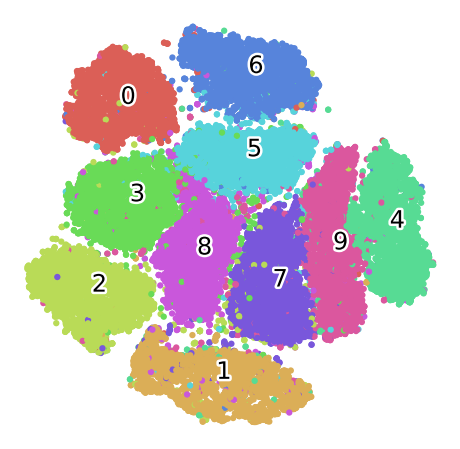

In [15]:
ScatterPlotTsne(tsneData,y)

### Divide data into 3 parts
    1.Train - To calculate nearest neighbors
    2.cross-validation: To find optimal value of k (Hyperparameter)
    3.Test: To test final accuracy of the model

In [17]:
X_1, X_test, y_1, y_test = train_test_split(X,y,test_size = 0.25, random_state = 10)
X_train, X_cv, y_train, y_cv = train_test_split(X_1,y_1,test_size = 0.20, random_state = 10)
print(X_train.shape, X_test.shape, X_cv. shape, y_train.shape, y_test.shape, y_cv.shape)

(25200, 784) (10500, 784) (6300, 784) (25200,) (10500,) (6300,)


## SVM Classifier

In [18]:
#1) Linear Kernel
classifier = SVC(kernel = 'linear', random_state = 0, C=10, gamma=0.1)
classifier.fit(X_train, y_train)

SVC(C=10, gamma=0.1, kernel='linear', random_state=0)

In [19]:
y_pred = classifier.predict(X_test)

In [20]:
# Accuracy
accuracy_score(y_test,y_pred)

0.9153333333333333

In [21]:
#2) polynomial kernel
svclassifier = SVC(kernel='poly',degree=5,gamma=0.1,random_state =10,C=10)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

In [22]:
# Accuracy
accuracy_score(y_test,y_pred)

0.950952380952381

In [23]:
#3) Gaussian Kernel
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)


In [24]:
# Accuracy
accuracy_score(y_test,y_pred)

0.9725714285714285

## Logistic Regression

In [25]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
y_pred = logmodel.predict(X_test)

C:\Users\DEEPIKA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
# Accuracy
accuracy_score(y_test,y_pred)

0.915047619047619

### Random Forest Classifier

In [27]:
clf = RandomForestClassifier(n_estimators = 100, n_jobs=1, criterion="gini")
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [28]:
# Accuracy
accuracy_score(y_test,y_pred)

0.960952380952381

## xgboost

In [29]:
import xgboost as xgb

In [30]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train,y_train)

C:\Users\DEEPIKA\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:49:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
xgb_clf.score(X,y)

0.988452380952381

In [32]:
y_pred = xgb_clf.predict(X_test)

In [33]:
#Accuracy
XGB_Acc=accuracy_score(y_test,y_pred)
print(XGB_Acc)

0.9723809523809523


### Using Test Data set

In [34]:
min_max_scaler = preprocessing.MinMaxScaler()
Test01 = min_max_scaler.fit_transform(mnist_test.values)
X1 = pd.DataFrame(Test01)

In [36]:
Y1=logmodel.predict(X1)

In [38]:
Y1.shape

(28000,)